In [1]:
!pip install git+https://github.com/imanring/BSTPP.git

  Cloning https://github.com/imanring/BSTPP.git to /tmp/pip-req-build-8fn6ork4
  Running command git clone --filter=blob:none --quiet https://github.com/imanring/BSTPP.git /tmp/pip-req-build-8fn6ork4
  Resolved https://github.com/imanring/BSTPP.git to commit 54ac69a7a37699f164584f3761973062fc9e7653
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for BSTPP, since package 'wheel' is not installed.
  Running setup.py install for BSTPP ... done


In [1]:
from bstpp.main import Point_Process_Model
import numpyro.distributions as dist
import numpy as np

In [2]:
A = np.array([[3,15.5],[4,16.5]])
column_names = ['droughtstart_speibase', 'urban_ih_log', 'droughtyr_speigdm',
       'herb_gc', 'capdist', 'grass_ih_log', 'nlights_sd_log', 'water_gc_log',
       'pop_gpw_sd_log', 'pasture_ih']
model_name = 'cox_hawkes'
model = Point_Process_Model('data/spt_data.csv',A,model=model_name,
                            spatial_cov='data/spatial_cov.csv',cov_grid_size=(0.5,0.5),
                            cov_names = column_names,
                            a_0=dist.Normal(0,5)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:169: UserWarning: `keep_geom_type=True` in overlay resulted in 4573 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersect = gpd.overlay(comp_grid, spatial_cov, how='intersection')


In [3]:
import sys
from bstpp import inference_functions
from bstpp import utils
sys.modules['inference_functions'] = inference_functions
sys.modules['utils'] = utils

import pickle
pre_run = False
if pre_run:
    with open(f'output/{model_name}/output.pkl', 'rb') as f:
        output = pickle.load(f)
    model.mcmc = output['mcmc']
    model.mcmc_samples = output['samples']
else:
    model.run_mcmc(num_warmup=500,num_samples=1000,output_file=f'output/{model_name}/output.pkl')

sample: 100%|█████████████████████████| 1500/1500 [2:04:59<00:00,  5.00s/it, 127 steps of size 2.94e-02. acc. prob=0.94]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0     -4.85      0.68     -4.82     -6.05     -3.80    480.40      1.01
         alpha      0.78      0.01      0.78      0.76      0.80   1763.78      1.00
          beta      1.43      0.06      1.43      1.34      1.52   1222.84      1.00
      sigmax_2      0.00      0.00      0.00      0.00      0.00    973.45      1.00
          w[0]      3.12      0.37      3.11      2.45      3.67    748.11      1.00
          w[1]      0.39      0.10      0.39      0.21      0.55    612.65      1.01
          w[2]      0.22      0.06      0.22      0.12      0.33    785.76      1.01
          w[3]     -1.27      0.25     -1.27     -1.62     -0.83    675.70      1.00
          w[4]      0.77      0.14      0.77      0.54      1.01    625.65      1.00
          w[5]     -0.03      0.09     -0.04     -0.19      0.12   1011.39      1.00
          w[6]      0.95      0.15      0.95      0.73      1.20

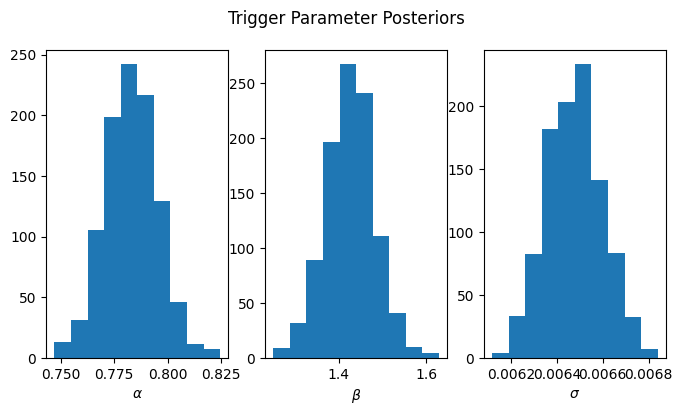

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
alpha,0.782920,0.012221,64.063080,0.0,0.759096,0.807031
beta,1.425675,0.056131,25.399082,0.0,1.314515,1.535034
sigma,0.006476,0.000121,53.496464,0.0,0.006236,0.006717


In [4]:
model.plot_trigger_posterior(f'output/{model_name}/trig_post.png')

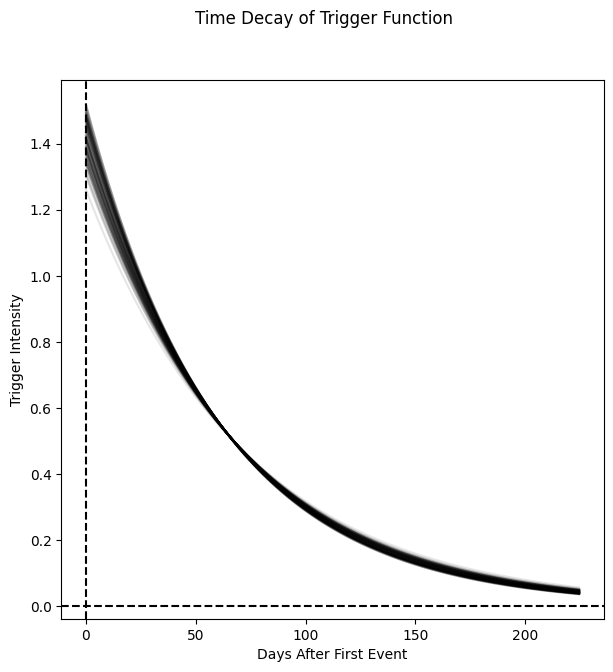

Mean trigger time: 64.17 days


In [5]:
model.plot_trigger_time_decay(f'output/{model_name}/trig_post_time_decay.png')

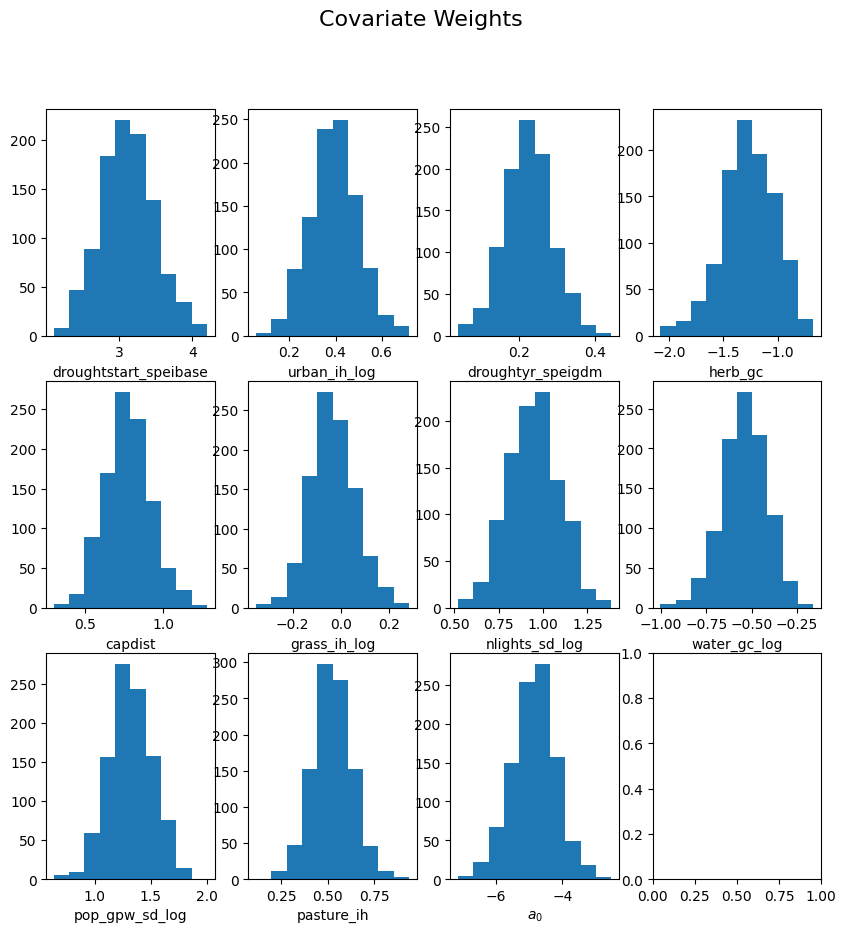

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,3.120162,0.368005,8.478580,0.000000e+00,2.449952,3.880816
urban_ih_log,0.392347,0.104476,3.755370,1.730857e-04,0.197787,0.608180
droughtyr_speigdm,0.223855,0.063441,3.528576,4.178025e-04,0.100696,0.348245
herb_gc,-1.268037,0.245601,-5.163001,2.430222e-07,-1.803786,-0.829659
capdist,0.774390,0.144355,5.364490,8.117826e-08,0.512955,1.083020
grass_ih_log,-0.031750,0.094712,-0.335233,7.374496e-01,-0.208696,0.166889
nlights_sd_log,0.947134,0.145713,6.499987,8.032675e-11,0.674340,1.223919
water_gc_log,-0.540001,0.124563,-4.335147,1.456628e-05,-0.789612,-0.307652
pop_gpw_sd_log,1.322181,0.195486,6.763559,1.346423e-11,0.965776,1.705357
pasture_ih,0.526086,0.107237,4.905838,9.302951e-07,0.308025,0.744439


In [6]:
model.cov_weight_post_summary(plot_file=f'output/{model_name}/cov_post_hist.png',
                              summary_file=f'output/{model_name}/cov_par_summary.csv')

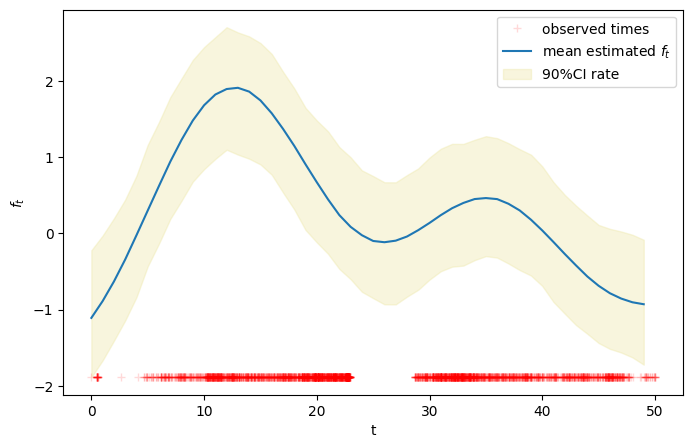

In [8]:
model.plot_temporal_background(f'output/{model_name}/temporal_gp_post_mean.png')

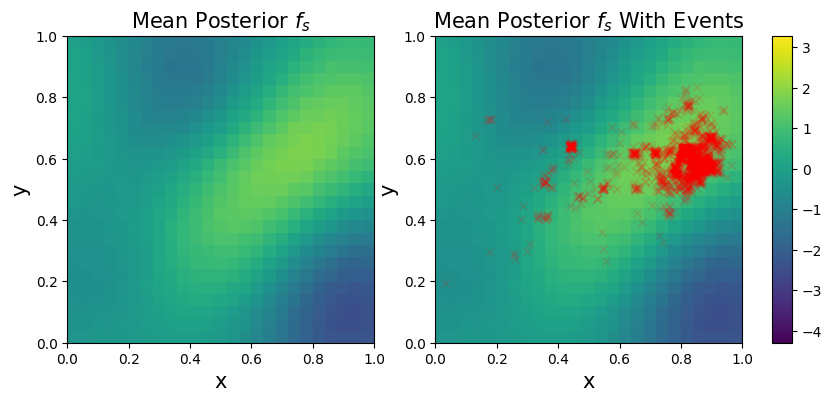

In [9]:
model.plot_spatial_background(f'output/{model_name}/spatial_gp_post_mean.png')

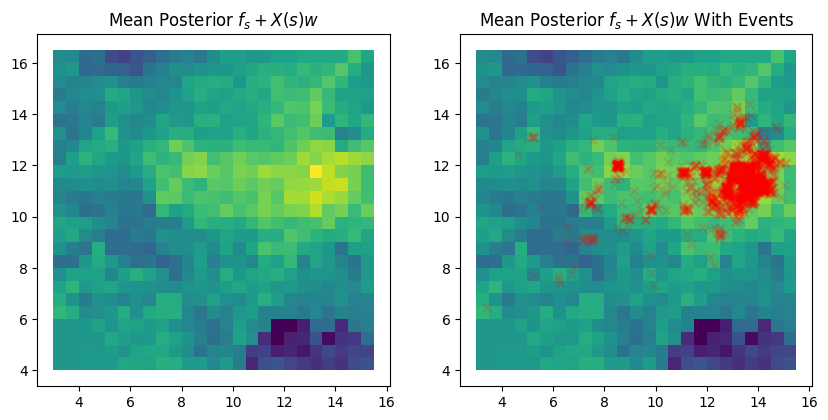

In [10]:
model.plot_spatial_background(f'output/{model_name}/spatial_gp_cov_post_mean.png',include_cov=True)